# Prevendo os efeitos do álcool em Doenças do Fígado

O fígado é um dos maiores e mais importantes órgãos do corpo humano.O peso do fígado é de cerca de 1,36 kg e é de cor marrom avermelhada. O  fígado  desempenha  mais  de  500  funções,  como  produção  de bile,  produção  de proteínas importantes para a coagulação do sangue, purificação do sangue, auxílio na digestão de gorduras, decomposição de glóbulos vermelhos e desintoxicação de produtos químicos nocivos.

A doença hepática causada por vírus hepatotrópicos impõe uma carga substancial aos recursos de saúde.O diagnóstico preciso dos pacientes é muito importante na ciência médica.A medicação errada pode levar ao desperdício de dinheiro e tempo para os pacientes, às vezes isso pode levar à perda irreparável(morte)

As hepatites virais são um grave problema de saúde pública no Brasil e no mundo. Segundo estimativas, bilhoes de pessoas já tiveram contado com os vírus das hepatites e milhoes são portadores crônicos. O termo hepatite viral geralmente se refere aos vírus hepatotrópicos, sendo que atualmente os mais conhecidos - A, B, C, D, E - são os responsáveis por mais de 90% dos casos de hepatite aguda.

Os vírus da hepatite causam ampla variedade de apresentações clínicas, que vao desde um estado de portador assintomático, hepatite aguda, fulminante ou crônica até cirrose hepática e carcinoma hepatocelular.

# Atributos

tot_bilirubin - bilirrubina total

direct_bilirubin - bilirrubina direta

albumina

ag_ratio - razão albumina/globulina

tot_proteins - proteina total

alkphos -  fosfatase alcalina

sgpt - alanina aminotransferase 

sgot - aspartato aminotransferase


No sangue estão presentes duas classes de proteínas, a Albumina e as Globulinas. A Albumina é uma proteína de elevado valor biológico que é encontrada no plasma do sangue e é sintetizada pelo fígado. É a principal proteína circulante no organismo humano e é responsável pelo transporte plasmático de várias substâncias.

O fígado é o único órgão responsável pela produção da Albumina. As Globulinas abrangem enzimas, anticorpos e mais de 500 outras proteínas. A relação albumina/globulinas é obtida dividindo a quantidade de albumina no sangue pela quantidade de globulinas.Uma baixa relação A/G pode refletir uma superprodução de globulinas, como acontece em algumas Doenças Autoimunes ou um défice de produção de Albumina, como nos casos de cirrose. Uma elevada relação A/G indica um défice de produção de imunoglobinas.

A medida das proteínas totais no sangue reflete o estado nutricional da pessoa, e pode ser usada no diagnóstico de doenças renais, hepáticas e de outros distúrbios. Se os níveis de proteínas totais estiverem alterados, devem-se fazer outros testes para identificar qual a proteína específica que está alterada, para que possa ser feito o diagnóstico correto.

A fosfatase alcalina é uma enzima encontrada em diversos tecidos do corpo, incluindo fígado, ossos, rins, intestino e placenta - mas as maiores concentrações de fosfatase alcalina estão no fígado e ossos. O exame de fosfatase alcalina mede os níveis dessa enzima no sangue.

O exame da alanina aminotransferase (TGP), também conhecido como ALT ou TGP, é um exame de sangue que ajuda a identificar lesões e doenças do fígado devido à presença elevada da enzima alanina aminotransferase, também chamada de transaminase glutâmico pirúvica, no sangue, que normalmente se encontra entre as 7 e 56 U/L de sangue.

A enzima transaminase pirúvica (TGO) está presente dentro das células do fígado e, por isso, quando existe alguma lesão nesse órgão, provocada por um vírus ou substâncias tóxicas, por exemplo, é comum que a enzima seja liberada para a corrente sanguínea, levando a um aumento dos seus níveis no exame de sangue,
Aspartato aminotransferase é uma enzima encontrada em todo o corpo, mas em maior quantidade no fígado. Quando há lesão de células, essa enzima é liberada na circulação e elevação do nível sanguíneo




In [1]:
#Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Dense, Dropout
import tensorflow as tf
from tensorflow import keras
import scikitplot as skplt
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.metrics import classification_report, matthews_corrcoef, accuracy_score
from sklearn.metrics import roc_curve, auc
import scikitplot as skplt


In [2]:
#Carregando o dataset
data = pd.read_csv('dataset.csv')

In [3]:
#Verificando os dados
data.head()

,idade,sexo,tot_bilirubin,direct_bilirubin,tot_proteins,albumina,ag_ratio,sgpt,sgot,alkphos,classe
0,65,Mulher,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Homem,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Homem,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Homem,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Homem,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
#Verificando numero de linhas e colunas
data.shape

(583, 11)

In [5]:
#Verificando os tipos e não nulos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   idade             583 non-null    int64  
 1   sexo              583 non-null    object 
 2   tot_bilirubin     583 non-null    float64
 3   direct_bilirubin  583 non-null    float64
 4   tot_proteins      583 non-null    int64  
 5   albumina          583 non-null    int64  
 6   ag_ratio          583 non-null    int64  
 7   sgpt              583 non-null    float64
 8   sgot              583 non-null    float64
 9   alkphos           579 non-null    float64
 10  classe            583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [6]:
#Verificando os dados nulos
data.isnull().sum()

idade               0
sexo                0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumina            0
ag_ratio            0
sgpt                0
sgot                0
alkphos             4
classe              0
dtype: int64

In [7]:
#Verificando os dados unicos para cada variável
data.nunique()

idade                72
sexo                  2
tot_bilirubin       113
direct_bilirubin     80
tot_proteins        263
albumina            152
ag_ratio            177
sgpt                 58
sgot                 40
alkphos              69
classe                2
dtype: int64

In [8]:
#Verificando as linhas que contem nulos
data_null = data[data['alkphos'].isnull()]
data_null.head()

,idade,sexo,tot_bilirubin,direct_bilirubin,tot_proteins,albumina,ag_ratio,sgpt,sgot,alkphos,classe
209,45,Mulher,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,Homem,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,Mulher,0.6,0.2,180,12,15,5.2,2.7,NaN,2
312,27,Homem,1.3,0.6,106,25,54,8.5,4.8,NaN,2


<AxesSubplot:>

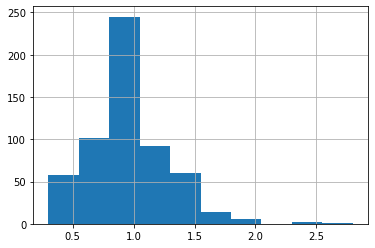

In [9]:
#Histograma da variável alkphos
data['alkphos'].hist()

In [10]:
#Como são poucoas linhas NAn, vamos retirá-las do dataset
data = data.drop(data[data['alkphos'].isnull()].index)

In [11]:
#Verificando
data.isnull().sum()

idade               0
sexo                0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumina            0
ag_ratio            0
sgpt                0
sgot                0
alkphos             0
classe              0
dtype: int64

In [12]:
#Agora vamos converter a variável sexo em valores 0(homem) e 1 (mulher)
data['sexo'] = data['sexo'].astype('category')
data['sexo'] = data['sexo'].cat.codes

In [13]:
data.describe()

,idade,sexo,tot_bilirubin,direct_bilirubin,tot_proteins,albumina,ag_ratio,sgpt,sgot,alkphos,classe
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000
mean,44.782383,0.241796,3.315371,1.494128,291.366149,81.126079,110.414508,6.481693,3.138515,0.947064,1.284974
std,16.221786,0.428542,6.227716,2.816499,243.561863,183.182845,289.850034,1.084641,0.794435,0.319592,0.451792
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,0.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,0.000000,2.600000,1.300000,298.000000,61.000000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


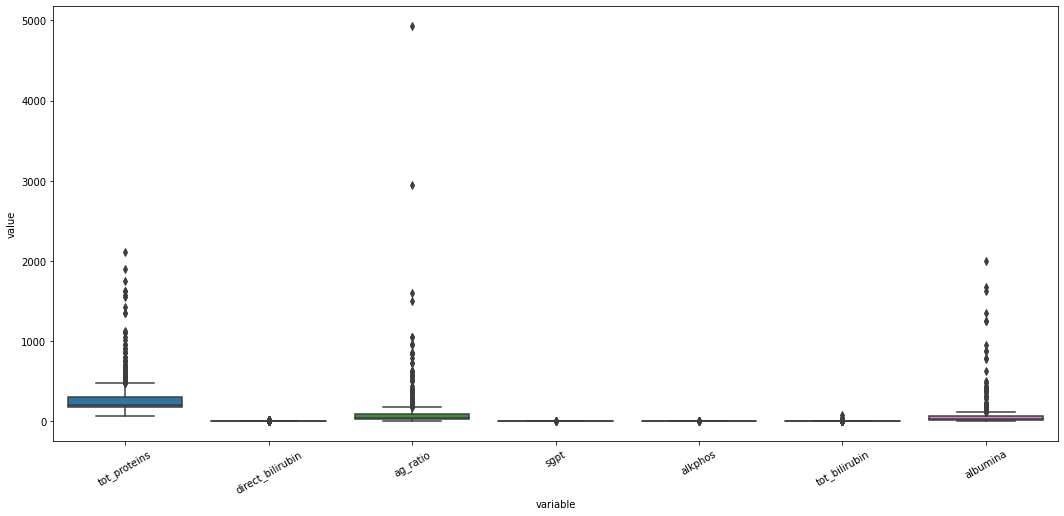

In [14]:
# Criando boxplots para as variáveis

cols = ['tot_proteins', 'direct_bilirubin','ag_ratio','sgpt','alkphos','tot_bilirubin','albumina']
data2 = data[cols]


# Tamanho da figura
f, ax = plt.subplots(figsize = (18, 8))


# Cria o boxplot
ax = sns.boxplot(x = "variable", y = "value", data = pd.melt(data2))

# Faz a rotação do label
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30)

# Show
plt.show()


In [15]:
# Define X (variáveis explicativas) e y (variável target)
X = data.drop('classe', axis = 1)
y = data['classe']

In [16]:
# Aplica a divisão com proporção 80/20
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.20, random_state = 101)

In [17]:
X_treino.shape, y_treino.shape

((463, 10), (463,))

In [18]:
X_teste.shape, y_teste.shape

((116, 10), (116,))

<AxesSubplot:>

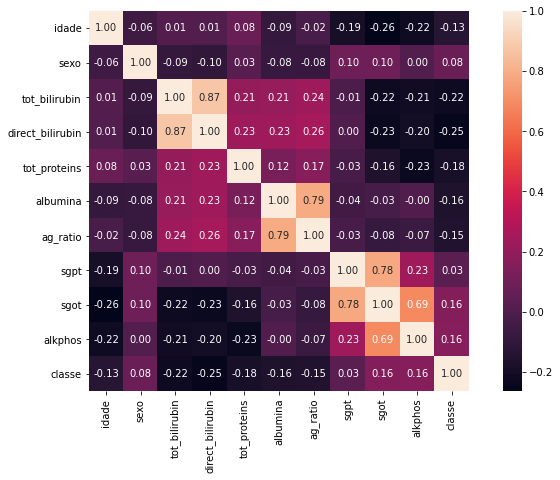

In [19]:
#Verificando as correlações
corr = data.corr()
plt.subplots(figsize = (12, 7))
sns.heatmap(corr, cbar = True, annot = True, square = True, fmt = '.2f', annot_kws = {'size': 10})



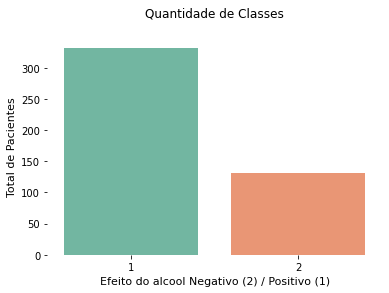

In [20]:
#Verificando o balanceamento da variável target
sns.countplot(y_treino, palette="Set2")
plt.box(False)
plt.xlabel("Efeito do alcool Negativo (2) / Positivo (1)", fontsize = 11)
plt.ylabel("Total de Pacientes", fontsize = 11)
plt.title("Quantidade de Classes\n")
plt.show()

In [21]:
# Seed para reproduzir o mesmo resultado
seed = 100


# Cria o balanceador SMOTE
smote_bal = SMOTE(random_state = seed)

# Aplica o balanceador
X_res, y_res = smote_bal.fit_resample(X_treino, y_treino)

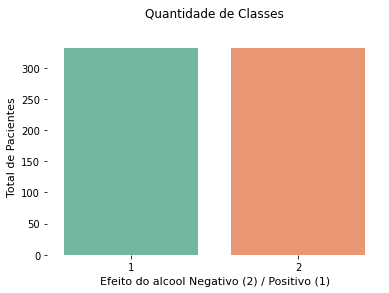

In [22]:
#Verificando o balanceamento da variável target
sns.countplot(y_res, palette="Set2")
plt.box(False)
plt.xlabel("Efeito do alcool Negativo (2) / Positivo (1)", fontsize = 11)
plt.ylabel("Total de Pacientes", fontsize = 11)
plt.title("Quantidade de Classes\n")
plt.show()

# Versão 1- Regressão Logística

In [23]:
modelo_v1 = sm.MNLogit(y_res,sm.add_constant(X_res))
result= modelo_v1.fit()

stats1=result.summary()


print(stats1)


Optimization terminated successfully.
         Current function value: 0.495892
         Iterations 9
                          MNLogit Regression Results                          
Dep. Variable:                 classe   No. Observations:                  664
Model:                        MNLogit   Df Residuals:                      653
Method:                           MLE   Df Model:                           10
Date:                Tue, 25 Aug 2020   Pseudo R-squ.:                  0.2846
Time:                        16:34:45   Log-Likelihood:                -329.27
converged:                       True   LL-Null:                       -460.25
Covariance Type:            nonrobust   LLR p-value:                 1.656e-50
        classe=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                8.3306      1.648      5.055      0.000       5.101      11.561
idade      

# Versão 2 - Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
# Cria e treina o modelo
modelo_v2 = RandomForestClassifier(n_estimators = 150)
modelo_v2.fit(X_res, y_res)

RandomForestClassifier(n_estimators=150)

In [25]:
# Previsões
previsoes_v2 = modelo_v2.predict(X_teste)
matriz_v2 = confusion_matrix(y_teste, previsoes_v2)
print(matriz_v2)

[[66 16]
 [17 17]]


In [26]:
# Relatório de classificação
report = classification_report(y_teste, previsoes_v2)
print(report)

              precision    recall  f1-score   support

           1       0.80      0.80      0.80        82
           2       0.52      0.50      0.51        34

    accuracy                           0.72       116
   macro avg       0.66      0.65      0.65       116
weighted avg       0.71      0.72      0.71       116



In [27]:
# Score AUC
print(roc_auc_score(y_teste, previsoes_v2))

0.652439024390244


/home/jfs/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


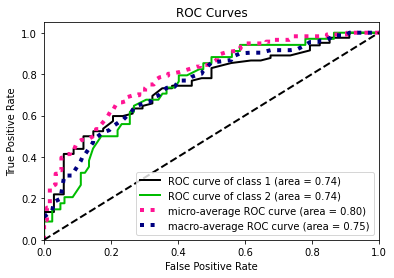

In [28]:
# Calcula a Curva ROC para cada classe
y_probs_v2 = modelo_v2.predict_proba(X_teste)
skplt.metrics.plot_roc_curve(y_teste, y_probs_v2)
plt.show()

In [29]:
# Coeficiente de Correlação Matthews
print(matthews_corrcoef(y_teste, previsoes_v2))

0.3075930545513935


## Otimização de Hiperparâmetros

#GridSearchCV para testes de Hyperparametros
from sklearn.model_selection import GridSearchCV
#Lista de possíveis valores de estimators ou quantidade de árvores da floresta.
valores_estimators = [10, 20, 50, 100, 150]
#Lista de possíveis valores para o critério de divisão.
valores_criterion = ['gini','entropy']
#Lista de possíveis valores para a profundidade máxima de cada árvore
valores_max_depth = [10, 20, 50, 100]
#Lista de possíveis valores para os parametros min_samples_split e min_samples_leaf.
valores_min_samples_split = [2, 5, 10,15]
valores_min_samples_leaf = [1, 5, 10,15]
#Define um dicionário que recebe as listas de parâmetros e valores.
parametros_grid = dict(n_estimators=valores_estimators,
                       criterion=valores_criterion,
                       max_depth=valores_max_depth,
                       min_samples_split=valores_min_samples_split,
                       min_samples_leaf=valores_min_samples_leaf 
                      )


#Instancia o GridSearch com o modelo a ser utilizado, parametros, número de folds e scoring.
rf = RandomForestClassifier()
grid = GridSearchCV(rf, parametros_grid, cv=5, scoring='accuracy')
#Aplica o GridSearch passando as features e classes
grid.fit(X_res,y_res)

grid.best_params_

clf = RandomForestClassifier(criterion = 'gini',
 max_depth= 20,
 min_samples_leaf= 1,
 min_samples_split= 2,
 n_estimators= 150)
clf = clf.fit(X_res,y_res)
valores_previstos = clf.predict(X_teste)

In [30]:
#Verificando as métricas
#from sklearn import metrics
#print(metrics.classification_report(y_teste,valores_previstos, ))

# Versão 3 - RF Modificado


In [31]:
#Retirando a coluna tot_bilirubin e ag_ratio
#data = data.drop('tot_bilirubin', axis = 1)
#data = data.drop('ag_ratio', axis = 1)

In [32]:
# Aplica a divisão com proporção 80/20
#X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.20, random_state = 101)

In [33]:
# Cria e treina o modelo
#modelo_v3 = RandomForestClassifier(n_estimators = 150)
#modelo_v3.fit(X_treino, y_treino)

In [34]:
# Previsões
#previsoes_v3 = modelo_v3.predict(X_teste)
#matriz_v3 = confusion_matrix(y_teste, previsoes_v3)
#print(matriz_v3)

In [35]:
# Relatório de classificação
#report = classification_report(y_teste, previsoes_v3)
#print(report)

In [36]:
# Coeficiente de Correlação Matthews
#print(matthews_corrcoef(y_teste, previsoes_v3))

# Versão 4 -  Deep Learning

In [65]:
X_res.shape


(664, 10)

In [72]:
# Construção do modelo com Keras

modelo_v4 = Sequential()
modelo_v4.add(Dense(256, input_dim = 10, activation = 'relu'))
modelo_v4.add(Dropout(0.5))
modelo_v4.add(Dense(256, activation = 'relu'))
modelo_v4.add(Dropout(0.5))
modelo_v4.add(Dense(1, activation = 'sigmoid'))
modelo_v4.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


In [73]:
# Treinamos o modelo
history = modelo_v4.fit(X_res, y_res, epochs = 100, batch_size = 128, verbose = 1, validation_split = 0.1)

Epoch 1/100
5/5 [==============================] - 0s 19ms/step - loss: 30.1321 - accuracy: 0.1960 - val_loss: 22.7239 - val_accuracy: 0.0000e+00
Epoch 2/100
5/5 [==============================] - 0s 6ms/step - loss: 25.5434 - accuracy: 0.2194 - val_loss: 18.5842 - val_accuracy: 0.0000e+00
Epoch 3/100
5/5 [==============================] - 0s 7ms/step - loss: 24.1332 - accuracy: 0.2228 - val_loss: 14.6642 - val_accuracy: 0.0000e+00
Epoch 4/100
5/5 [==============================] - 0s 7ms/step - loss: 21.5119 - accuracy: 0.2496 - val_loss: 10.9647 - val_accuracy: 0.0000e+00
Epoch 5/100
5/5 [==============================] - 0s 7ms/step - loss: 20.7736 - accuracy: 0.2714 - val_loss: 7.5987 - val_accuracy: 0.0000e+00
Epoch 6/100
5/5 [==============================] - 0s 7ms/step - loss: 14.2574 - accuracy: 0.2730 - val_loss: 4.7181 - val_accuracy: 0.0000e+00
Epoch 7/100
5/5 [==============================] - 0s 7ms/step - loss: 13.0909 - accuracy: 0.2814 - val_loss: 2.2106 - val_accuracy

Epoch 57/100
5/5 [==============================] - 0s 7ms/step - loss: -92.0579 - accuracy: 0.5410 - val_loss: -202.8159 - val_accuracy: 0.0000e+00
Epoch 58/100
5/5 [==============================] - 0s 6ms/step - loss: -84.3238 - accuracy: 0.5461 - val_loss: -218.5184 - val_accuracy: 0.0000e+00
Epoch 59/100
5/5 [==============================] - 0s 7ms/step - loss: -93.6258 - accuracy: 0.5461 - val_loss: -235.2705 - val_accuracy: 0.0000e+00
Epoch 60/100
5/5 [==============================] - 0s 6ms/step - loss: -114.2521 - accuracy: 0.5377 - val_loss: -253.4518 - val_accuracy: 0.0000e+00
Epoch 61/100
5/5 [==============================] - 0s 6ms/step - loss: -111.6524 - accuracy: 0.5444 - val_loss: -273.9772 - val_accuracy: 0.0000e+00
Epoch 62/100
5/5 [==============================] - 0s 6ms/step - loss: -127.9185 - accuracy: 0.5461 - val_loss: -296.3244 - val_accuracy: 0.0000e+00
Epoch 63/100
5/5 [==============================] - 0s 7ms/step - loss: -144.5227 - accuracy: 0.5444 - 

In [68]:
# Sumário do modelo
modelo_v4.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 256)               2816      
_________________________________________________________________
dropout_20 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_21 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 257       
Total params: 68,865
Trainable params: 68,865
Non-trainable params: 0
_________________________________________________________________


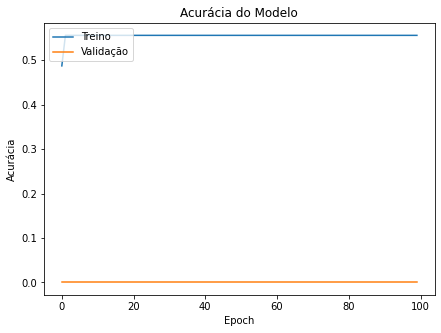

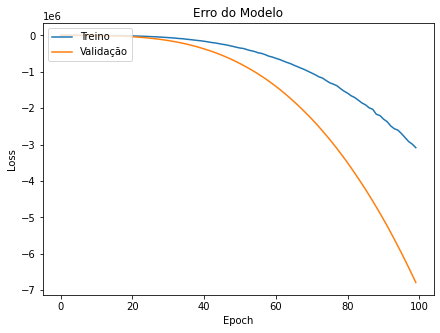

In [69]:
# Sumário da Acurácia
plt.figure(figsize=(7,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Acurácia do Modelo')
plt.ylabel('Acurácia')
plt.xlabel('Epoch')
plt.legend(['Treino', 'Validação'], loc = 'upper left')
plt.show()

# Loss
plt.figure(figsize=(7,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Erro do Modelo')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Treino', 'Validação'], loc = 'upper left')
plt.show()

In [70]:
# Previsões
previsoes_v4 = modelo_v4.predict_classes(X_teste)
matriz_v4 = confusion_matrix(y_teste, previsoes_v4)
print(matriz_v4)

[[82  0]
 [34  0]]


In [71]:
# Relatório de Classificação
report = classification_report(y_teste, previsoes_v4)
print(report)

              precision    recall  f1-score   support

           1       0.71      1.00      0.83        82
           2       0.00      0.00      0.00        34

    accuracy                           0.71       116
   macro avg       0.35      0.50      0.41       116
weighted avg       0.50      0.71      0.59       116



/home/jfs/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
# Score AUC
print(roc_auc_score(y_teste, previsoes_v4))

0.5


Instructions for updating:
Please use `model.predict()` instead.


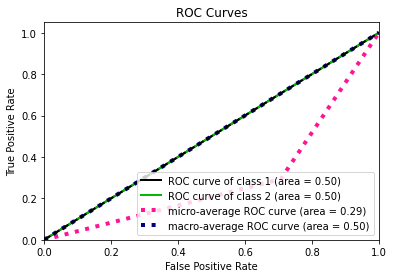

In [45]:
# Plot das métricas
import scikitplot as skplt
import matplotlib.pyplot as plt
f, (ax1) = plt.subplots(1)

# Calcula a Curva ROC para cada classe
y_probs_v4 = modelo_v4.predict_proba(X_teste)

# Precisamos usar esse procedimento pois o Keras apresenta apenas a probabilidade da classe prevista
skplt.metrics.plot_roc(y_teste, np.concatenate((1 - y_probs_v4, y_probs_v4), axis = 1), ax = ax1)
plt.show()

In [46]:
# Coeficiente de Correlação de Matthews
print(matthews_corrcoef(y_teste, previsoes_v4))

0.0


/home/jfs/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
